# Home Work Six - ML Zoomcamp 2025

Hi, I'm Norman! This is my submission for Home Work 6 for ML ZoomCamp 2025.

Let’s connect on [LinkedIn](https://www.linkedin.com/in/anormanangel/) and [Twitter](https://x.com/anormanangel) to keep learning together.


Task: The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import statistics
import xgboost as xgb

In [2]:
# Importing the dataset

df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Preparing the dataset

* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the train_test_split function and set the random_state parameter to 1.
* Use DictVectorizer(sparse=True) to turn the dataframes into matrices.

In [3]:
# Checking for missing values
df.isnull().sum()


engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [4]:
# Fillinhg missing values with zeros

df = df.fillna(0)
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [5]:
# Split into full_train and test
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

# Split full_train into train and validation
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(5822, 1941, 1941)

In [6]:
# Preperaing for DictVectorizer

# Preperaing for DictVectorizer
df_train = df_train.reset_index(drop=True)
y_train = df_train.fuel_efficiency_mpg.values
y_train

array([15.3014754 , 15.33121466, 15.33667895, ..., 15.18828665,
       17.3967514 , 16.16090373])

In [7]:
del df_train['fuel_efficiency_mpg']
df_train.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
dtype: object

In [8]:
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

# Remove the column to predict to avoid accidental usage
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## Question 1

* Which feature is used for splitting the data?




In [9]:
# Train a decision tree regressor to predict the fuel_efficiency_mpg variable.

dict_train = df_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)

dict_test = df_test.to_dict(orient='records')
X_test = dv.transform(dict_test)

In [10]:
#Train a model with max_depth=1.#

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [11]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



## Question 2

* What's the RMSE of this model on the validation data?

In [12]:
# Train a random forest regressor with these parameters: n_estimators=10, random_state=1, n_jobs=-1 (optional - to make training faster)


# Training the model
rf = RandomForestRegressor(
    n_estimators=10, 
    random_state=1,
    n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [13]:
# RMSE function
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [14]:
dict_val = df_val.to_dict(orient='records')
X_val = dv.transform(dict_val)

y_pred = rf.predict(X_val)

In [15]:
error = rmse(y_val, y_pred)
print('Anwswer 2 is', error)

Anwswer 2 is 0.4570712602619733


## Question 3

* After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

In [16]:
# Training models for various values of estimators
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(
        n_estimators=n,
        random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    mse = rmse(y_val, y_pred)
    scores.append((n, round(mse, 4)))

In [17]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.4571
1,20,0.4517
2,30,0.4500
3,40,0.4477
4,50,0.4461
5,60,0.4451
6,70,0.4446
7,80,0.4448
8,90,0.4444
9,100,0.4442


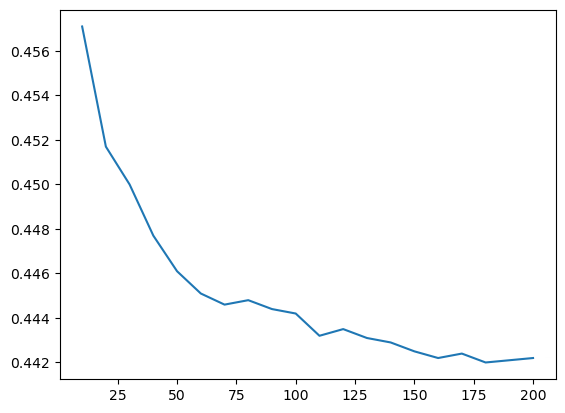

In [18]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

## Question 4

* What's the best max_depth, using the mean RMSE?

In [19]:
# Training for different max depth
scores = []

for d in [10, 15, 20, 25]:
    mse_values = []
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(
            n_estimators=n,
            max_depth=d,
            random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict(X_val)
        mse = rmse(y_val, y_pred)
        mse_values.append(mse)
    mean = statistics.fmean(mse_values)
    scores.append((d, mean))

df_scores = pd.DataFrame(scores, columns=['max_depth', 'mean_rmse'])
df_scores

,max_depth,mean_rmse
0,10,0.441774
1,15,0.445024
2,20,0.445955
3,25,0.445408
